In [ ]:
import requests
url = "https://www.tap.info.tn/en/portal%20-%20society"

# 设置请求头（模拟浏览器访问）
headers = {
    "User-Agent": "Mozilla/5.0"
}

# 尝试发送请求
response = requests.get(url, headers=headers)

# 检查状态码和部分内容
print("状态码:", response.status_code)
print(response.text[:1000])  # 打印部分HTML查看结构


状态码: 200
<!DOCTYPE HTML>
<html xmlns:fb="http://ogp.me/ns/fb#">
	<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# website: http://ogp.me/ns/website#">
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
                                <meta property="og:type" content="website" />
                <!-- <meta property="og:image" content="" /> -->
                                    <meta property="og:url" content="http://www.mena.org.eg/" />
                                <meta property="og:site_name" content="MENA" />
                <meta property="fb:app_id" content="298020053636654" />
                <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta name="keywords" content="" />
<meta name="description" content="presenting a selection of the most important news items carried by the Arabic service. They are directed to English speaking subscribers at home and abroad" /><script type="text/javascript" src="//ajax.googleapis.com/aja

In [11]:
import requests
import bs4
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import pandas as pd
# Step 1: 请求页面
url = "https://www.mena.org.eg/en/section/EnglishEgypt"
headers = {"User-Agent": "Mozilla/5.0"}
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

# Step 2: 关键词分类

keywords = {
    "政治（社会）风险": ["sanction", "strike", "protest", "riot", "conflict", "political", "instability", "military", "blockade"],
    "经济风险": ["inflation", "recession", "debt", "crisis", "price", "economic"],
    "自然风险": ["drought", "earthquake", "storm", "flood", "hurricane", "fire", "extreme weather", "starvation"]
}

# Step 3: 提取新闻
articles = soup.select("li.listedArticle")
six_months_ago = datetime.now() - timedelta(days=180)
results = []

for article in articles:
    a_tag = article.select_one("h4 a")
    date_tag = article.select_one("h6.listedArticleDate")

    if not a_tag or not date_tag:
        continue

    title = a_tag.text.strip()
    link = "https://www.mena.org.eg" + a_tag.get("data-href", "#")
    date_str = date_tag.text.strip().split(" - ")[0].replace("Date: ", "")
    
    try:
        pub_date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S GMT")
    except Exception:
        continue

    if pub_date < six_months_ago:
        continue

    # 判断关键词
    match_types = []
    matched_keywords = []

    for category, words in keywords.items():
        for word in words:
            if word.lower() in title.lower():
                if category not in match_types:
                    match_types.append(category)
                matched_keywords.append(word)

    if match_types:
        results.append({
            "日期": pub_date.strftime("%Y-%m-%d"),
            "标题": title,
            "类型": ", ".join(match_types),
            "匹配关键词": ", ".join(set(matched_keywords)),  # 去重后拼接
            "链接": link
        })

# Step 4: 输出结果
df = pd.DataFrame(results)
print(df.to_string(index=False))
df.to_excel("埃及/mena_news_filtered.xlsx", index=False)



        日期                                                                              标题       类型  匹配关键词                                                                链接
2025-05-04 Labor min.: New Labor Law benefits 30 mln workers, strikes labor market balance 政治（社会）风险 strike https://www.mena.org.eg/en/news/dbcall/table/textnews/id/11163961


In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import pandas as pd

# 设置关键词分类
keywords = {
    "政治(社会)风险": ["sanction", "strike", "protest", "riot", "instability"],
    "经济风险": ['inflation', 'recession', 'debt', 'crisis'],
    "自然风险": ["earthquake", "storm", "flood", "drought",  "extreme weather"]
}

# 设置基础参数
base_url = "https://www.mena.org.eg/en/section/EnglishEgypt"
headers = {"User-Agent": "Mozilla/5.0"}
six_months_ago = datetime.now() - timedelta(days=180)

# 结果列表
results = []

# 设置要爬取的页数范围
max_pages = 345  # 你可以改成20、30等
for page in range(1, max_pages + 1):
    if page == 1:
        url = base_url
    else:
        url = f"{base_url}/{page}"
    
    print(f"抓取第 {page} 页: {url}")
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    articles = soup.select("li.listedArticle")

    for article in articles:
        a_tag = article.select_one("h4 a")
        date_tag = article.select_one("h6.listedArticleDate")
        if not a_tag or not date_tag:
            continue

        title = a_tag.text.strip()
        link = "https://www.mena.org.eg" + a_tag.get("data-href", "#")
        date_str = date_tag.text.strip().split(" - ")[0].replace("Date: ", "")
        
        try:
            pub_date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S GMT")
        except Exception:
            continue
        if pub_date < six_months_ago:
            continue

        # 匹配关键词和分类（支持多个）
        match_types = []
        matched_keywords = []
        for category, words in keywords.items():
            for word in words:
                if word.lower() in title.lower():
                    if category not in match_types:
                        match_types.append(category)
                    matched_keywords.append(word)

        if match_types:
            results.append({
                "日期": pub_date.strftime("%Y-%m-%d"),
                "标题": title,
                "类型": ", ".join(match_types),
                "匹配关键词": ", ".join(set(matched_keywords)),
                "链接": link
            })

# 转为DataFrame并保存
df = pd.DataFrame(results)
print(df.to_string(index=False))
df.to_excel("2.xlsx", index=False)





抓取第 1 页: https://www.mena.org.eg/en/section/EnglishEgypt
抓取第 2 页: https://www.mena.org.eg/en/section/EnglishEgypt/2
抓取第 3 页: https://www.mena.org.eg/en/section/EnglishEgypt/3
抓取第 4 页: https://www.mena.org.eg/en/section/EnglishEgypt/4
抓取第 5 页: https://www.mena.org.eg/en/section/EnglishEgypt/5
抓取第 6 页: https://www.mena.org.eg/en/section/EnglishEgypt/6
抓取第 7 页: https://www.mena.org.eg/en/section/EnglishEgypt/7
抓取第 8 页: https://www.mena.org.eg/en/section/EnglishEgypt/8
抓取第 9 页: https://www.mena.org.eg/en/section/EnglishEgypt/9
抓取第 10 页: https://www.mena.org.eg/en/section/EnglishEgypt/10
抓取第 11 页: https://www.mena.org.eg/en/section/EnglishEgypt/11
抓取第 12 页: https://www.mena.org.eg/en/section/EnglishEgypt/12
抓取第 13 页: https://www.mena.org.eg/en/section/EnglishEgypt/13
抓取第 14 页: https://www.mena.org.eg/en/section/EnglishEgypt/14
抓取第 15 页: https://www.mena.org.eg/en/section/EnglishEgypt/15
抓取第 16 页: https://www.mena.org.eg/en/section/EnglishEgypt/16
抓取第 17 页: https://www.mena.org.eg/en/section

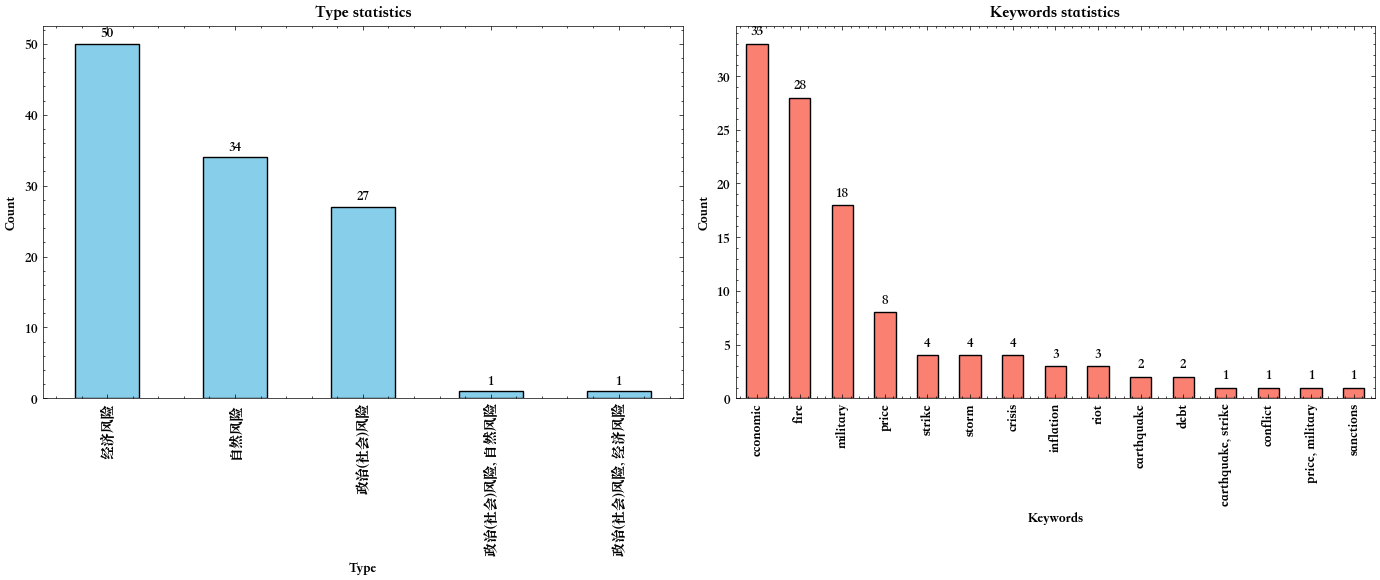

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
rcParams['font.family'] = 'Songti SC'
rcParams['axes.unicode_minus'] = False  # 显示负号

# 1. 读取Excel文件（替换为实际路径）
df = pd.read_excel("埃及/2.xlsx")

# 2. 统计“类型”和“关键词”的出现频次
type_counts = df["类型"].value_counts()
keyword_counts = df["匹配关键词"].value_counts()

# 3. 创建双子图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ------- 左图：类型统计 -------
type_counts.plot(kind="bar", ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title("Type statistics")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Type")

# 在每个条上添加具体数字
for i, v in enumerate(type_counts):
    axes[0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

# ------- 右图：关键词统计 -------
keyword_counts.plot(kind="bar", ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title("Keywords statistics")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Keywords")

# 在每个条上添加具体数字
for i, v in enumerate(keyword_counts):
    axes[1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/1067250250.py:47: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/1067250250.py:47: UserWarning: Glyph 27982 (\N{CJK UNIFIED IDEOGRAPH-6D4E}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/1067250250.py:47: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/1067250250.py:47: UserWarning: Glyph 38505 (\N{CJK UNIFIED IDEOGRAPH-9669}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/1067250250.py:47: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s

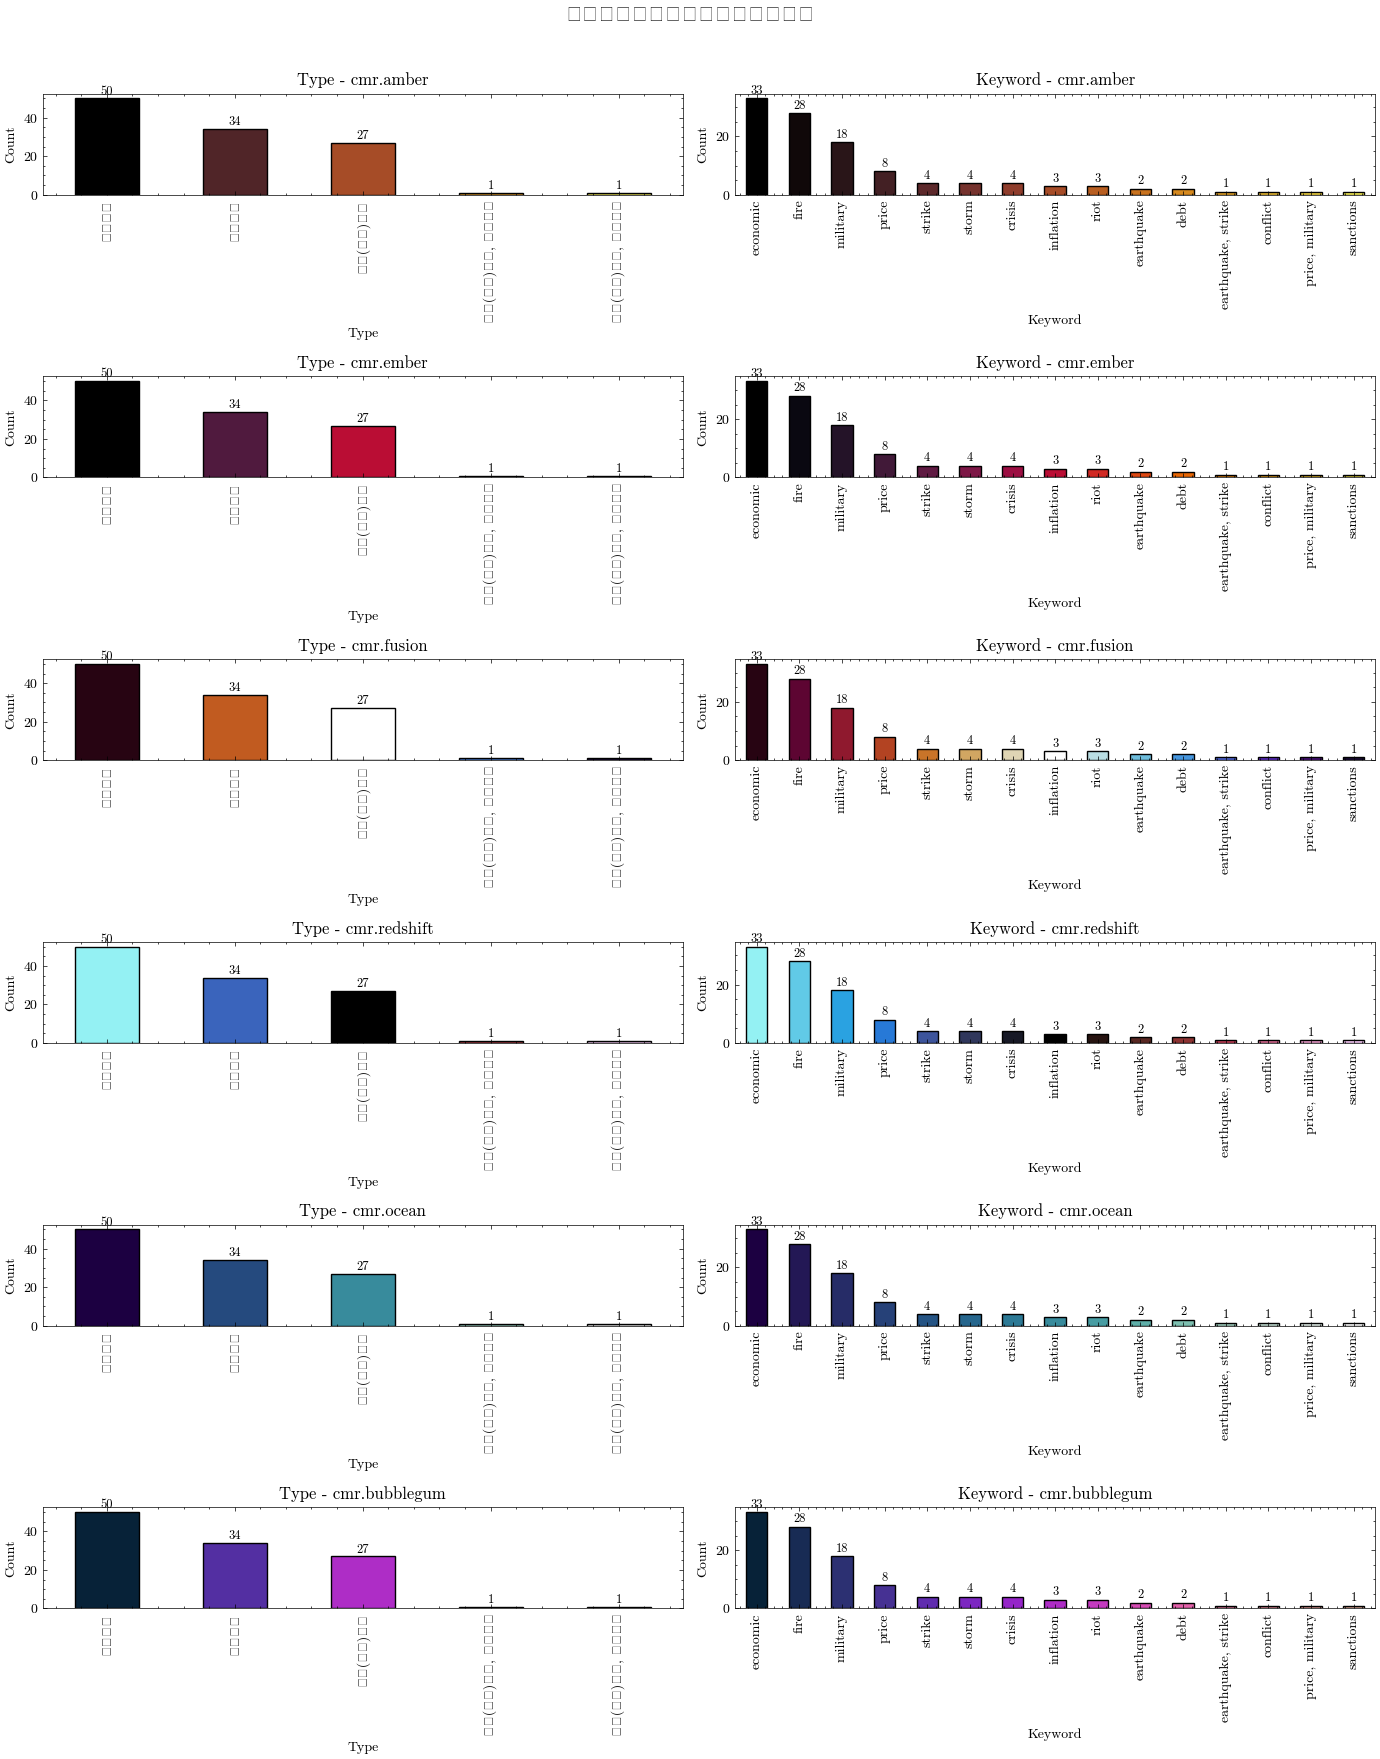

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scienceplots
import cmasher as cmr

# 设置中文字体
rcParams['font.family'] = 'Songti SC'
rcParams['axes.unicode_minus'] = False  # 显示负号

plt.style.use(['science', 'no-latex'])

# 读取数据
df = pd.read_excel("埃及/2.xlsx")
type_counts = df["类型"].value_counts()
keyword_counts = df["匹配关键词"].value_counts()

# 配色方案列表（你可以在这里自定义）
colormap_names = ['cmr.amber','cmr.ember', 'cmr.fusion', 'cmr.redshift', 'cmr.ocean', 'cmr.bubblegum']

fig, axes = plt.subplots(len(colormap_names), 2, figsize=(14, 3 * len(colormap_names)))
fig.suptitle('不同配色方案展示（请挑选一组）', fontsize=16)

for i, cmap_name in enumerate(colormap_names):
    # 当前配色
    type_colors = cmr.take_cmap_colors(cmap_name, len(type_counts), return_fmt='hex')
    keyword_colors = cmr.take_cmap_colors(cmap_name, len(keyword_counts), return_fmt='hex')
    
    # 左图
    type_counts.plot(kind="bar", ax=axes[i, 0], color=type_colors, edgecolor='black')
    axes[i, 0].set_title(f"Type - {cmap_name}")
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].set_xlabel("Type")
    
    for j, v in enumerate(type_counts):
        axes[i, 0].text(j, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

    # 右图
    keyword_counts.plot(kind="bar", ax=axes[i, 1], color=keyword_colors, edgecolor='black')
    axes[i, 1].set_title(f"Keyword - {cmap_name}")
    axes[i, 1].set_ylabel("Count")
    axes[i, 1].set_xlabel("Keyword")

    for j, v in enumerate(keyword_counts):
        axes[i, 1].text(j, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/3767255557.py:59: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/3767255557.py:59: UserWarning: Glyph 27982 (\N{CJK UNIFIED IDEOGRAPH-6D4E}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/3767255557.py:59: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/3767255557.py:59: UserWarning: Glyph 38505 (\N{CJK UNIFIED IDEOGRAPH-9669}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/v3/x57hn__d6r5_h8q1yt3lt7_h0000gn/T/ipykernel_21811/3767255557.py:59: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s

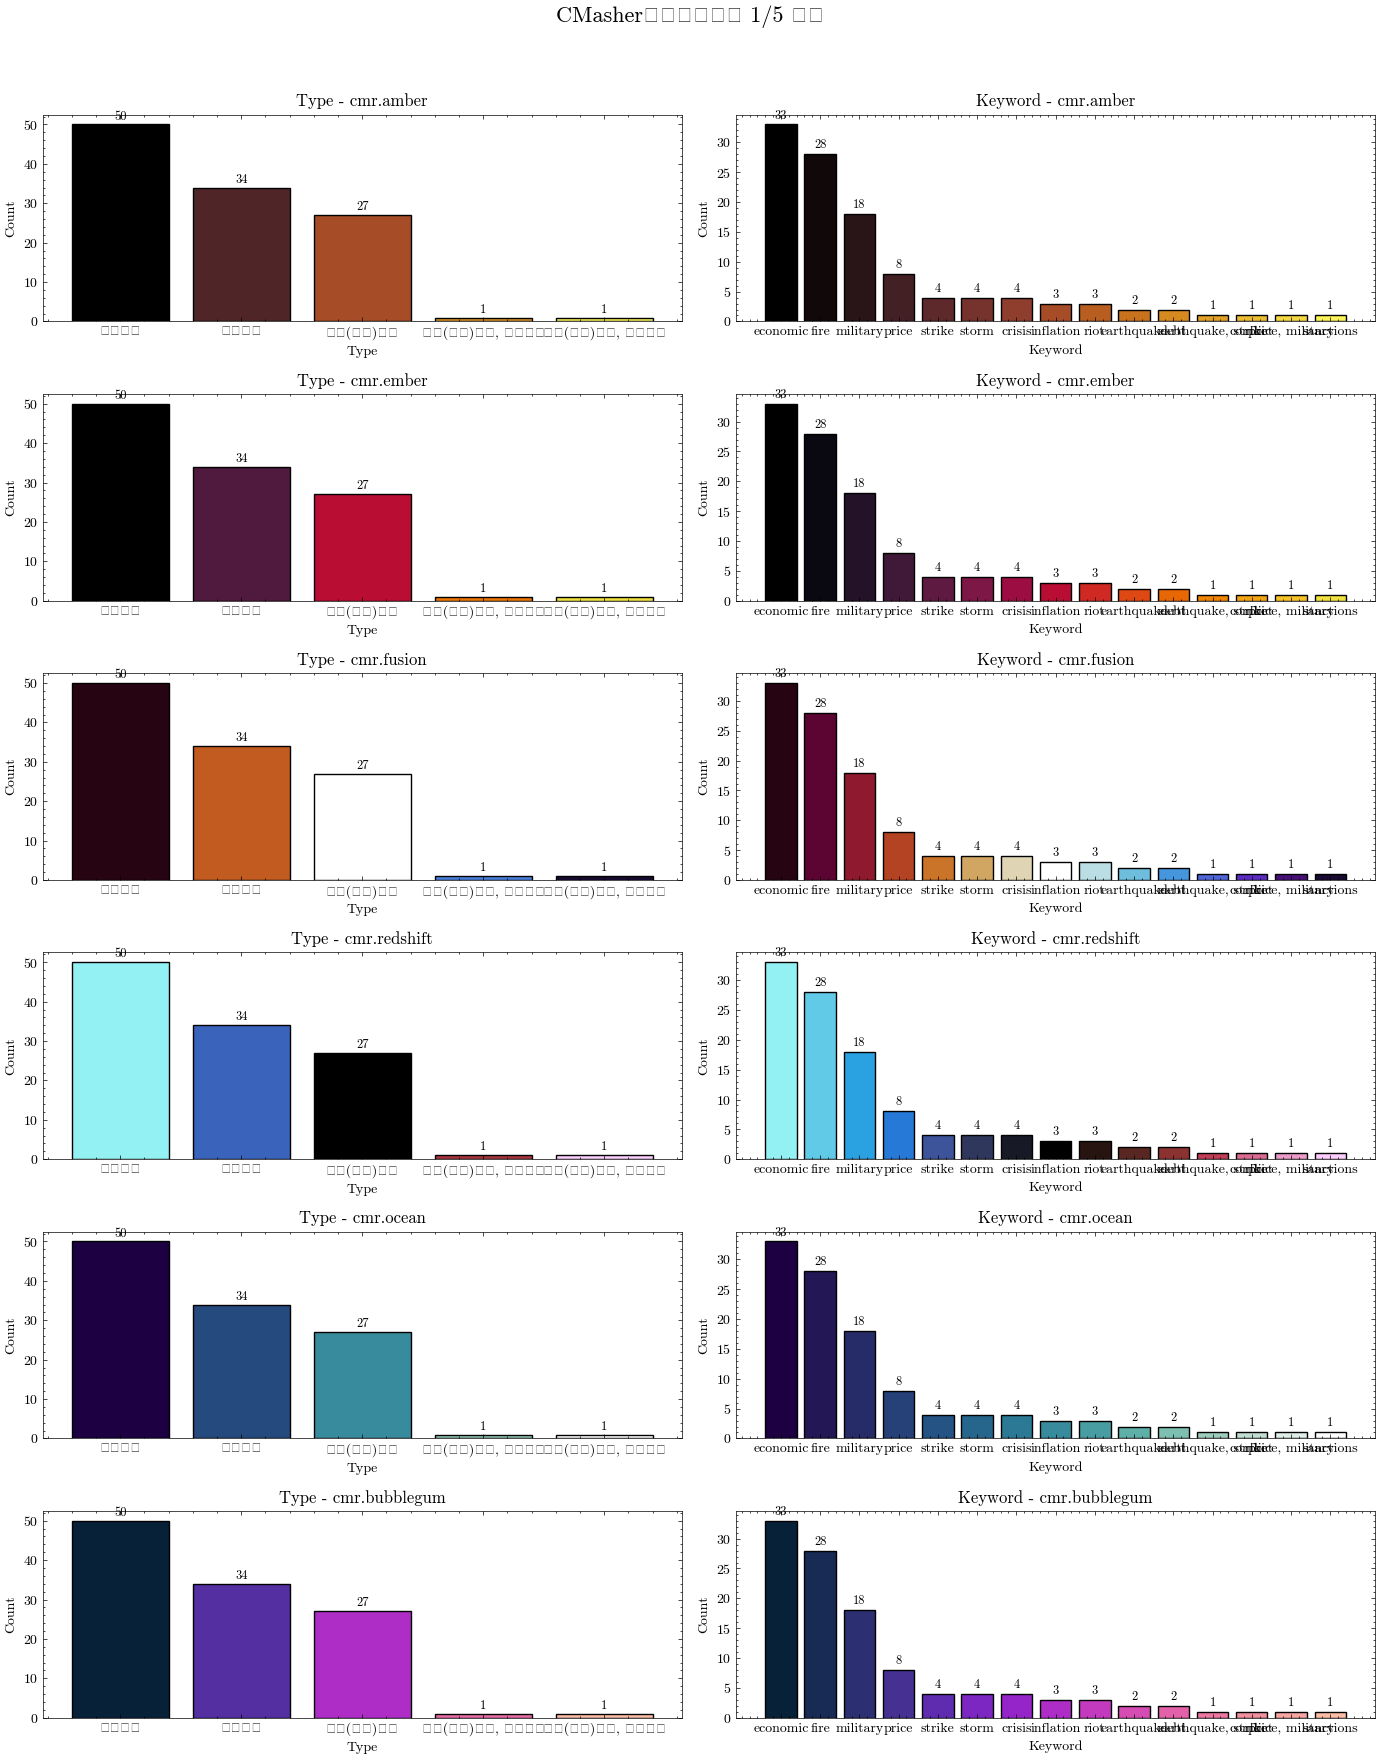

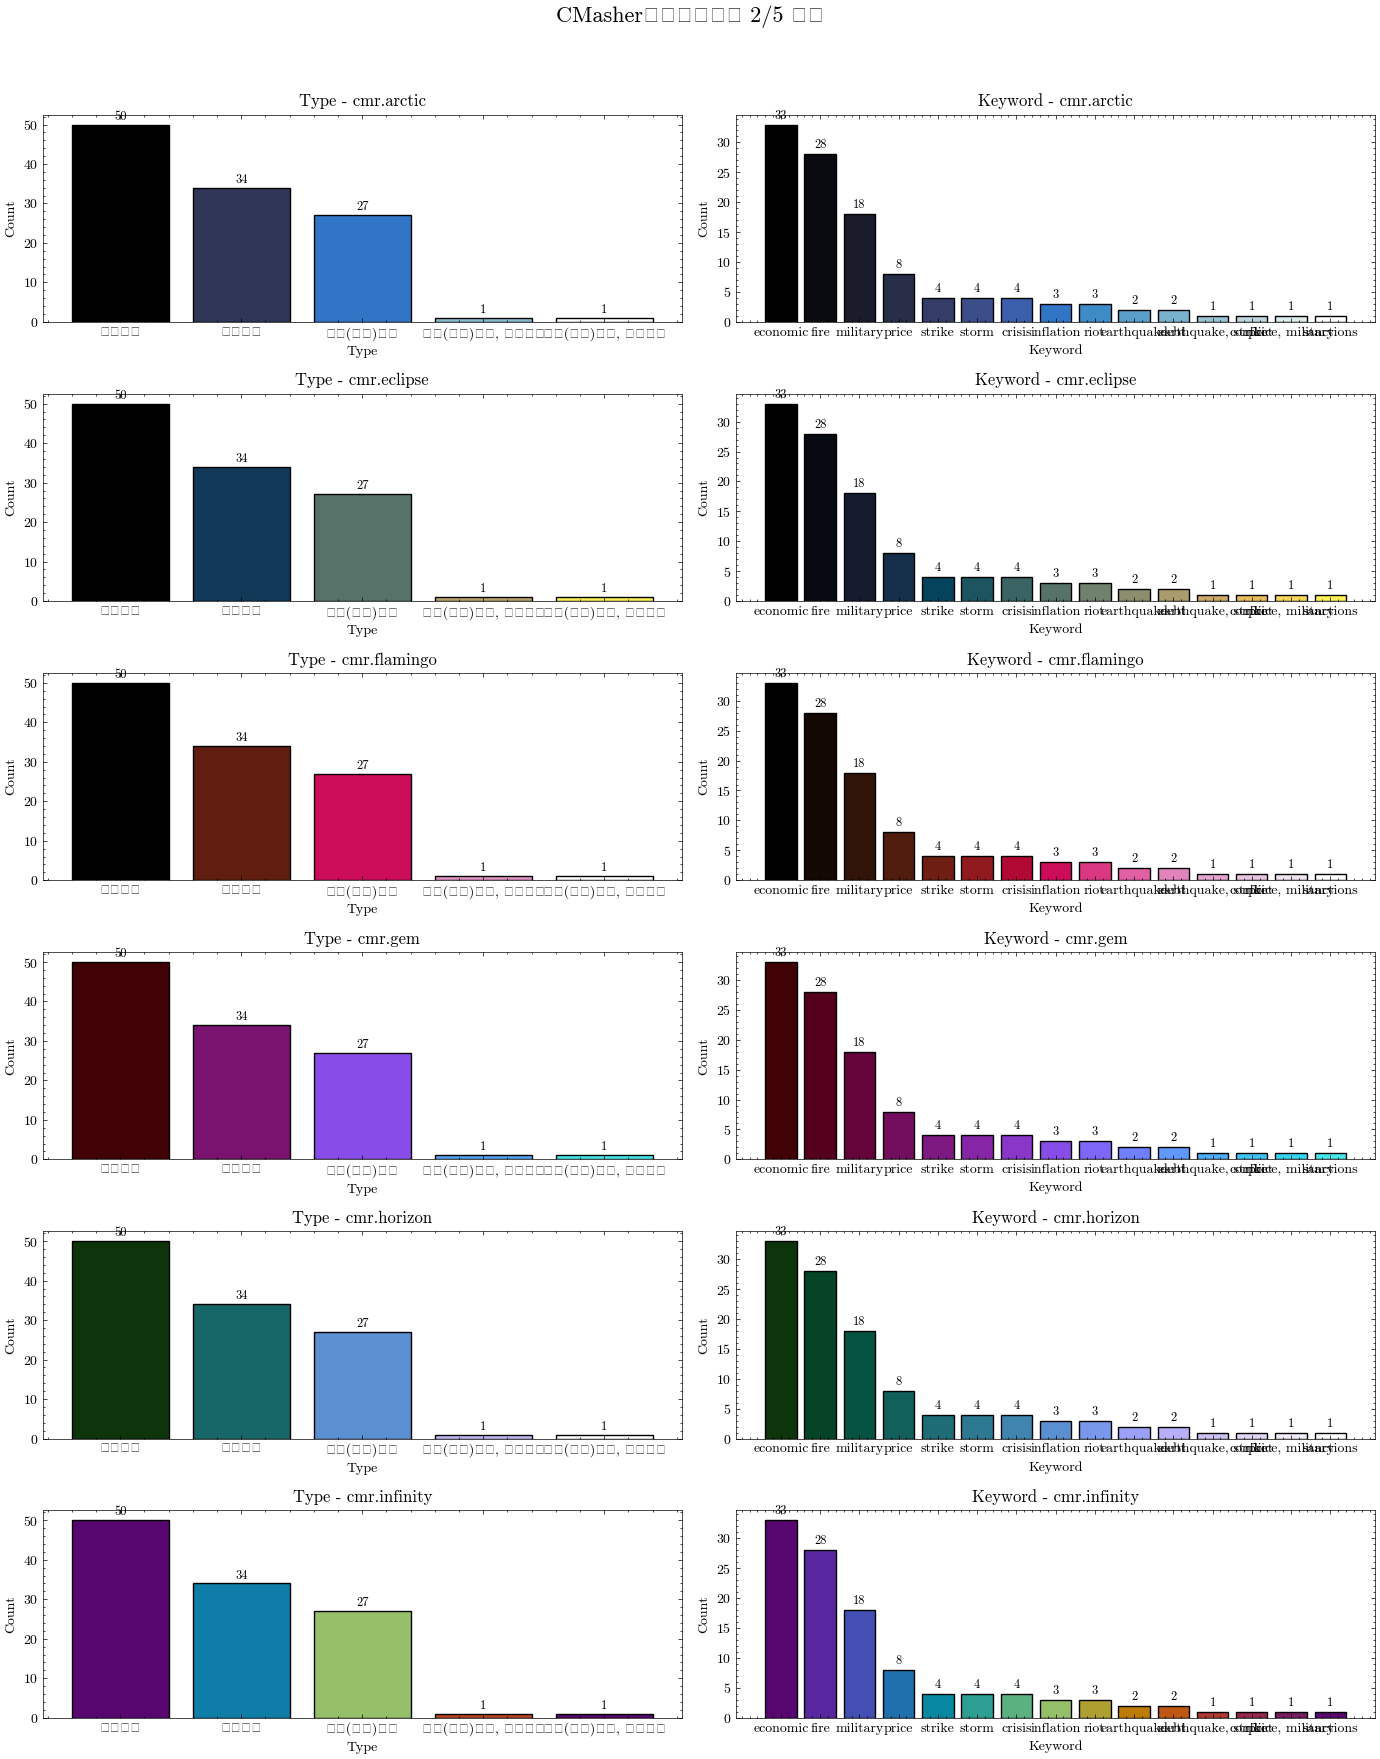

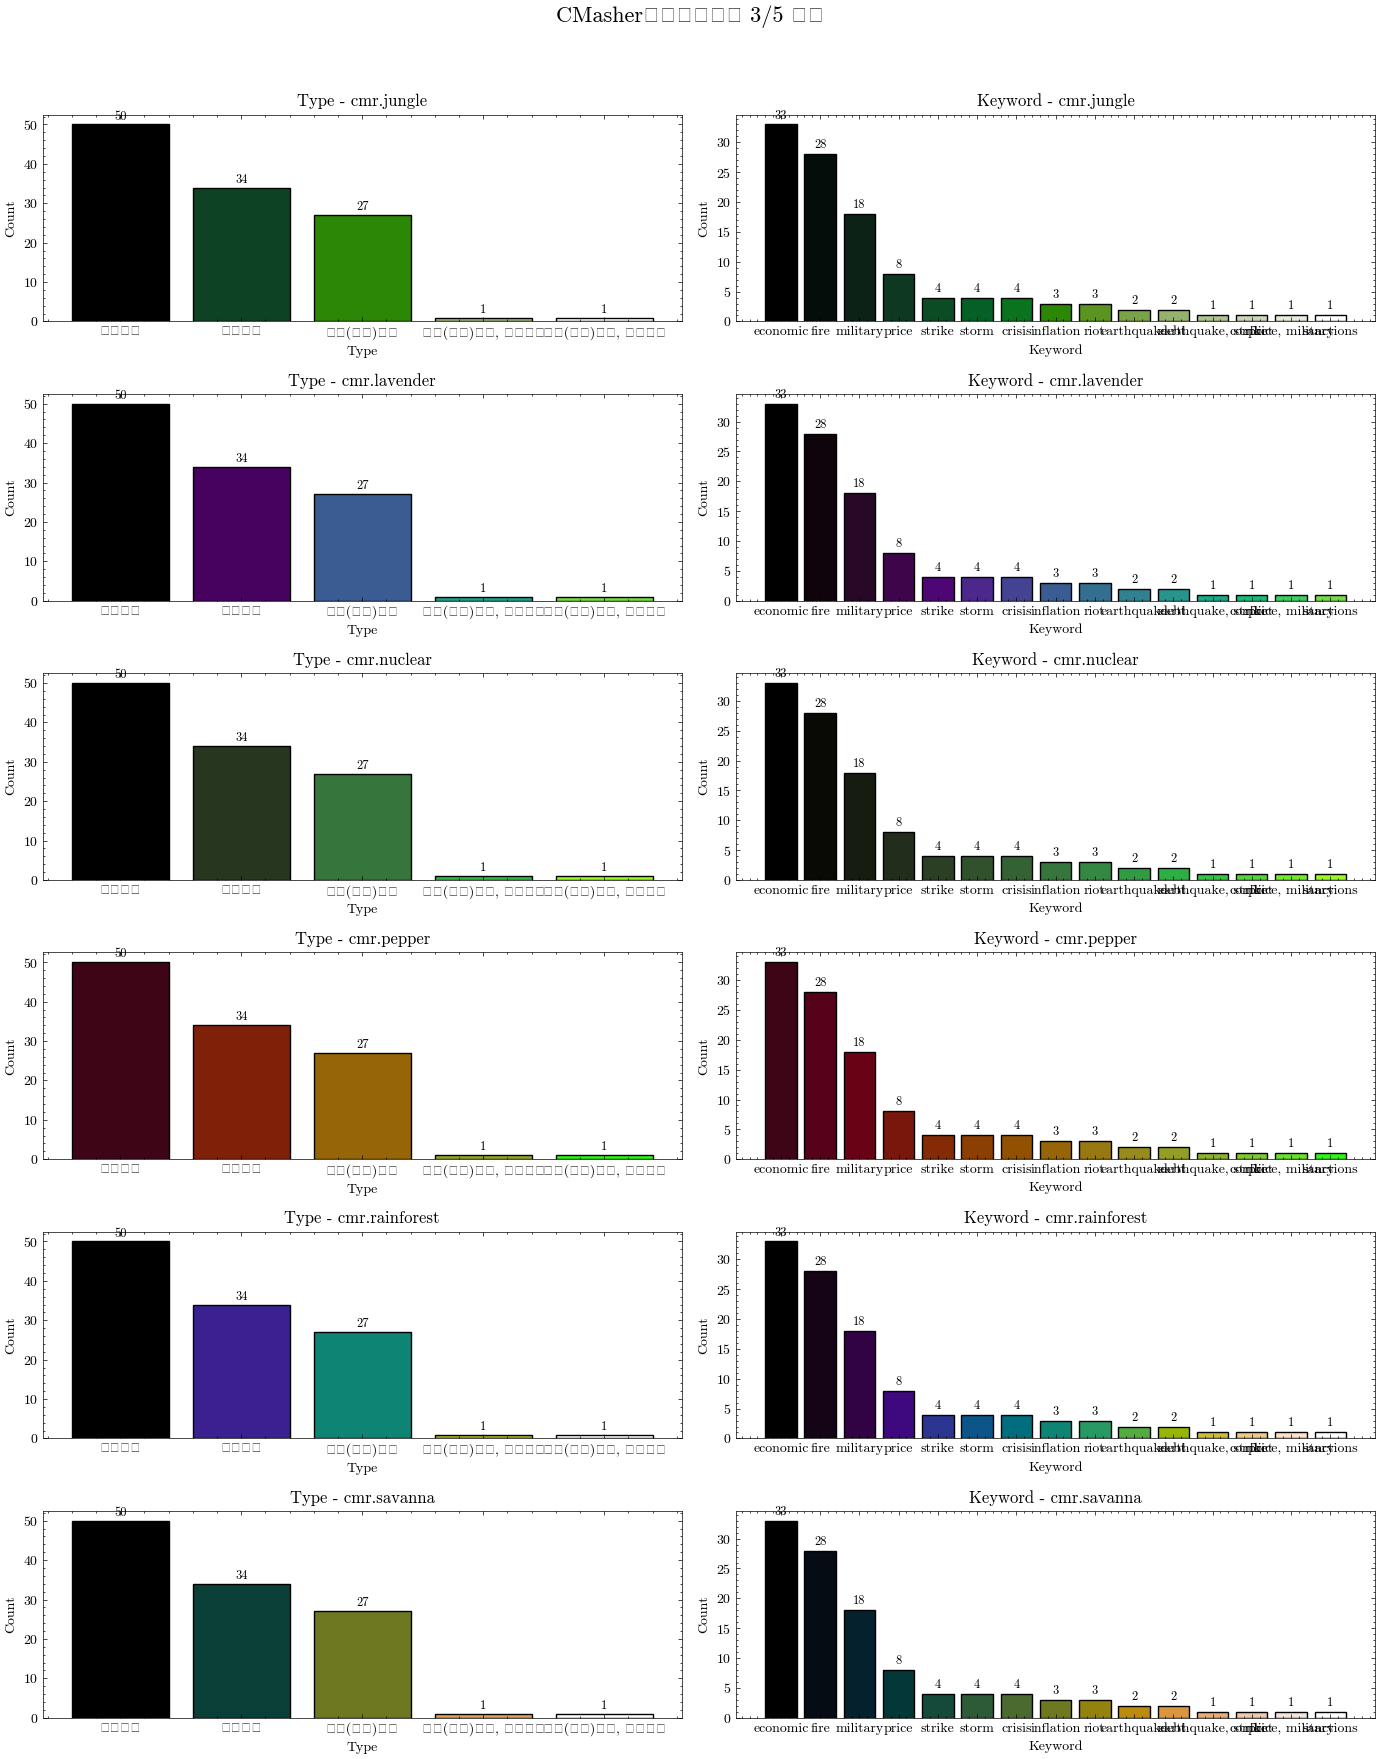

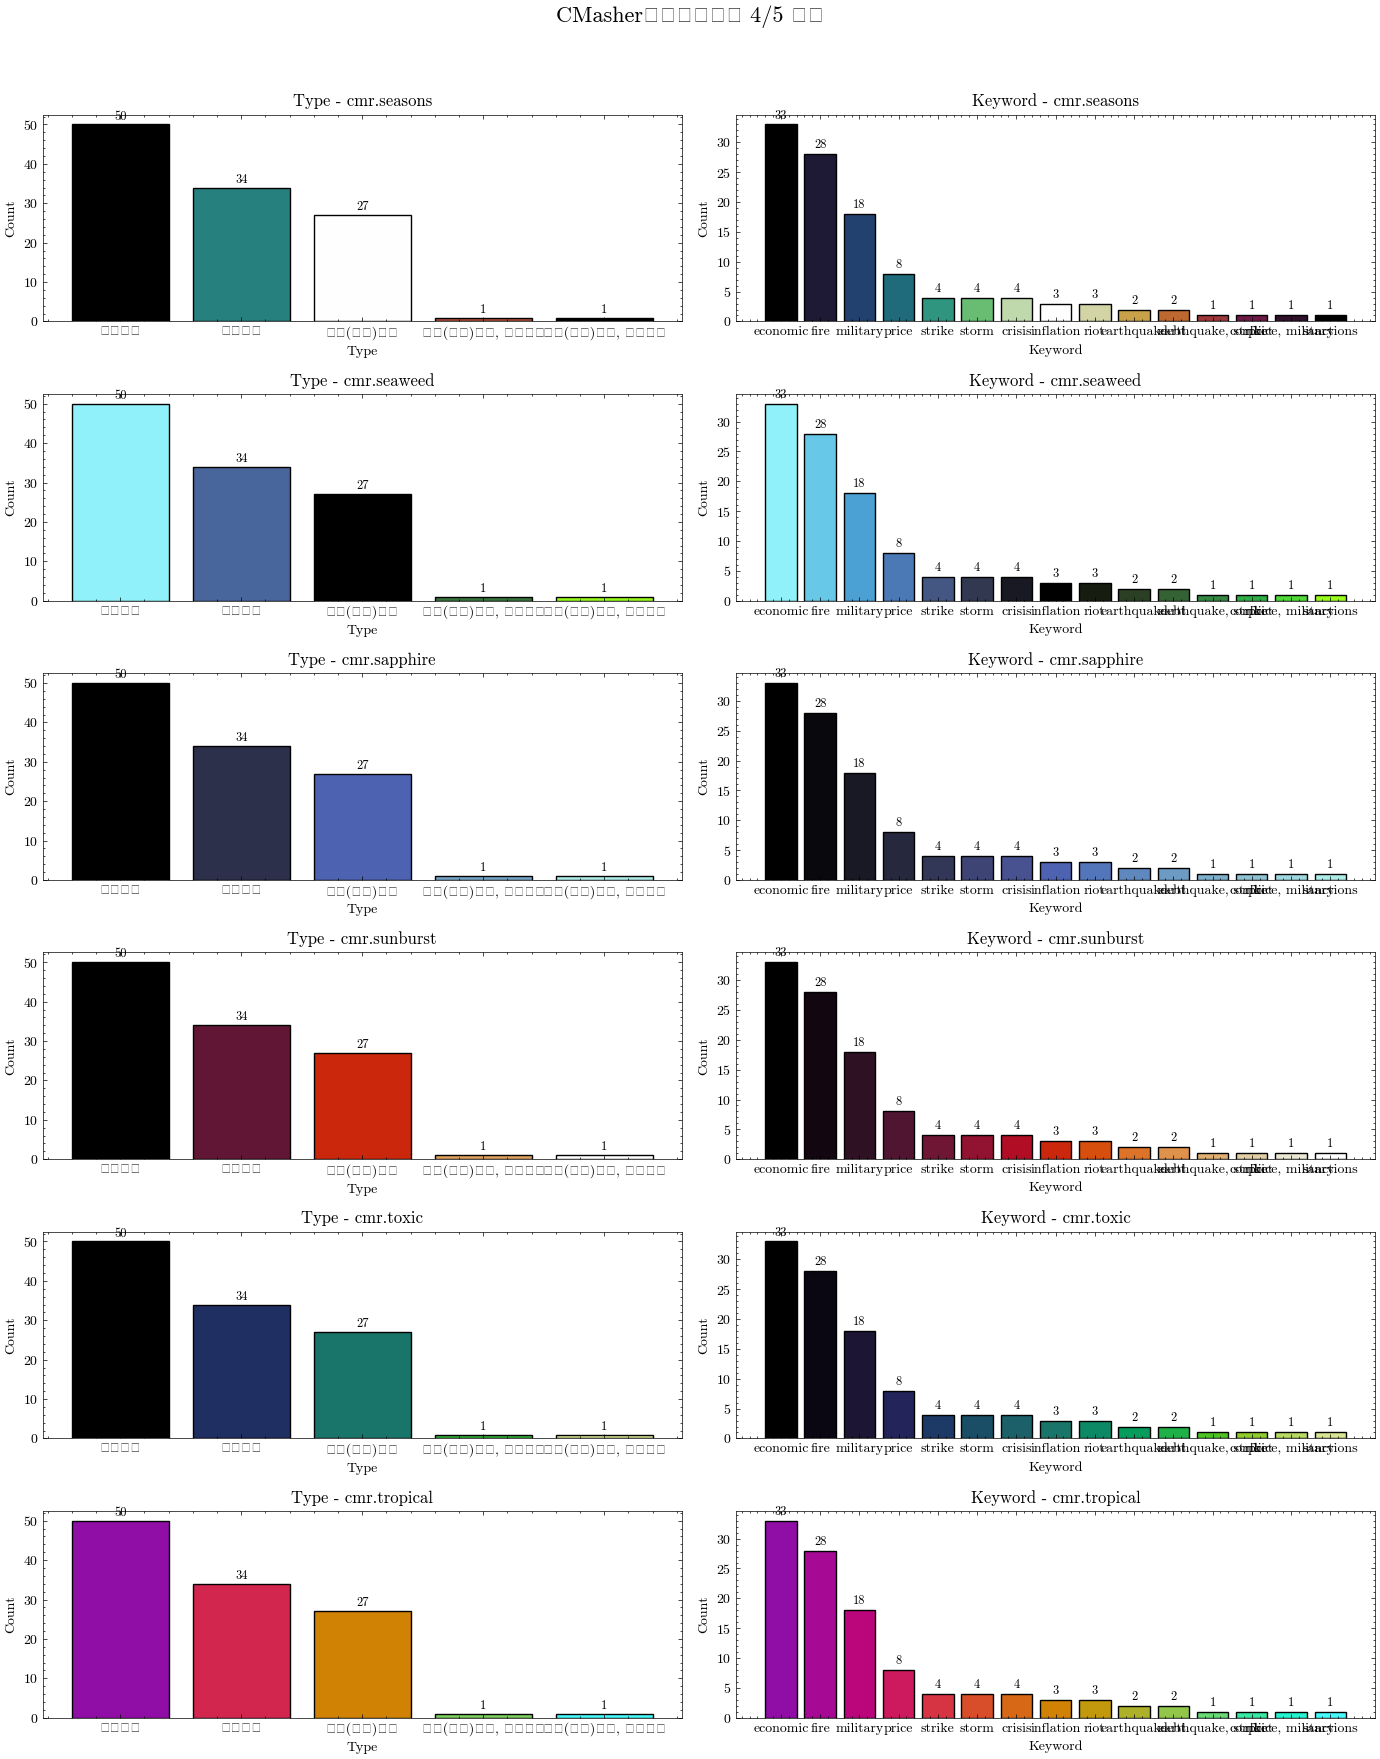

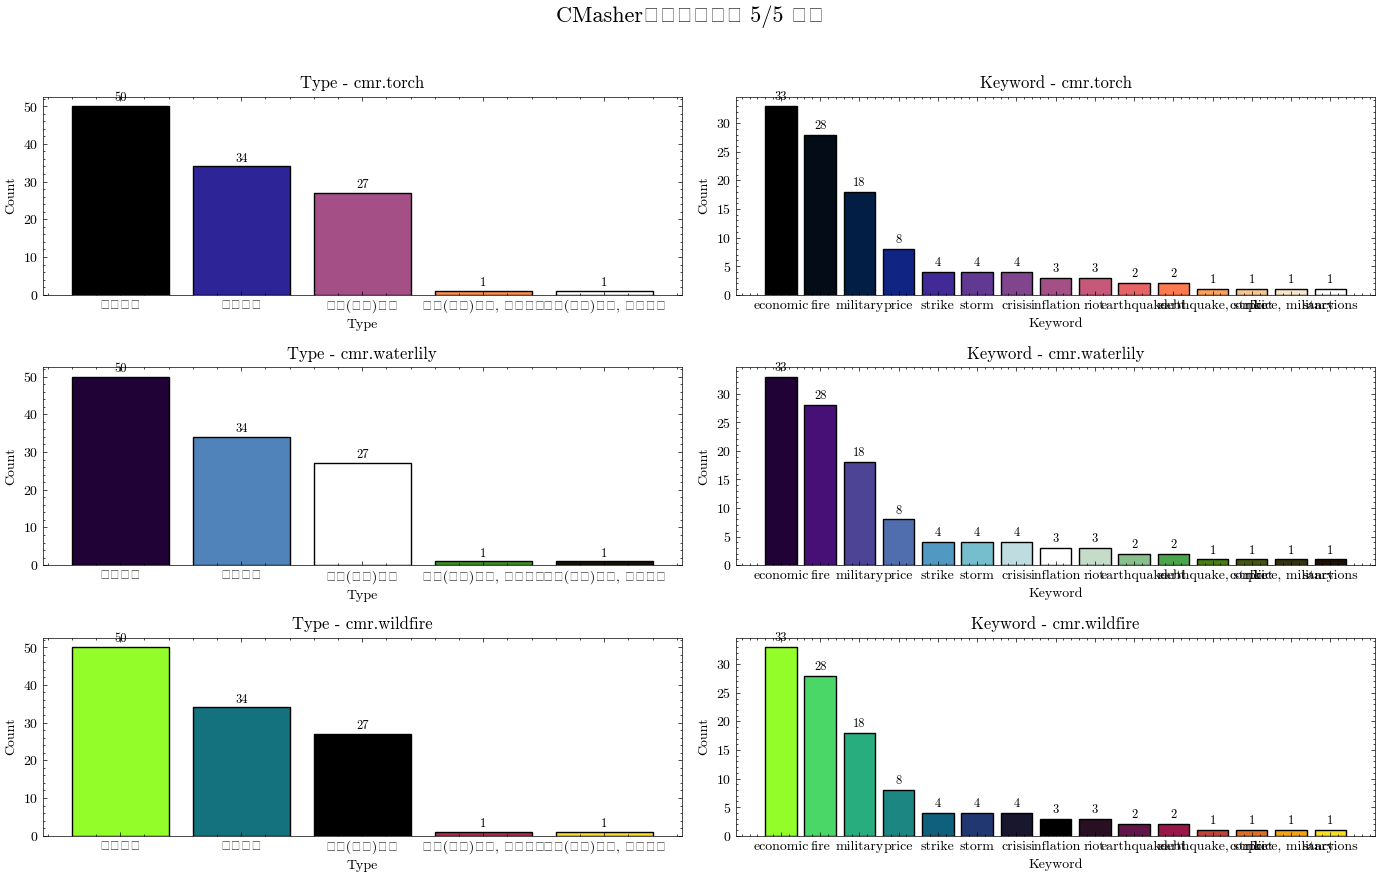

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
import scienceplots
import cmasher as cmr

# 设置中文字体
rcParams['font.family'] = 'Songti SC'
rcParams['axes.unicode_minus'] = False
plt.style.use(['science', 'no-latex'])

# 读取数据
df = pd.read_excel("埃及/2.xlsx")
type_counts = df["类型"].value_counts()
keyword_counts = df["匹配关键词"].value_counts()

# 所有可能的 colormap 名称（无 cmr. 前缀）
base_cmaps = [
    'amber', 'ember', 'fusion', 'redshift', 'ocean', 'bubblegum',
    'arctic', 'eclipse', 'flamingo', 'gem', 'horizon', 'infinity',
    'jungle', 'lavender', 'nuclear', 'pepper', 'rainforest', 'savanna',
    'seasons', 'seaweed', 'sapphire', 'sunburst', 'toxic', 'tropical',
    'torch', 'waterlily', 'wildfire'
]

# 自动加 cmr. 并只保留可用的
colormap_names = [f'cmr.{c}' for c in base_cmaps if f'cmr.{c}' in mpl.colormaps]

# 分页展示
per_page = 6
total_pages = (len(colormap_names) + per_page - 1) // per_page

for page in range(total_pages):
    cmap_subset = colormap_names[page * per_page: (page + 1) * per_page]
    fig, axes = plt.subplots(len(cmap_subset), 2, figsize=(14, 3 * len(cmap_subset)))
    fig.suptitle(f'CMasher配色展示（第 {page + 1}/{total_pages} 页）', fontsize=16)

    for i, cmap_name in enumerate(cmap_subset):
        type_colors = cmr.take_cmap_colors(cmap_name, len(type_counts), return_fmt='hex')
        keyword_colors = cmr.take_cmap_colors(cmap_name, len(keyword_counts), return_fmt='hex')

        # 左图
        axes[i, 0].bar(type_counts.index, type_counts.values, color=type_colors, edgecolor='black')
        axes[i, 0].set_title(f"Type - {cmap_name}")
        axes[i, 0].set_ylabel("Count")
        axes[i, 0].set_xlabel("Type")
        for j, v in enumerate(type_counts):
            axes[i, 0].text(j, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

        # 右图
        axes[i, 1].bar(keyword_counts.index, keyword_counts.values, color=keyword_colors, edgecolor='black')
        axes[i, 1].set_title(f"Keyword - {cmap_name}")
        axes[i, 1].set_ylabel("Count")
        axes[i, 1].set_xlabel("Keyword")
        for j, v in enumerate(keyword_counts):
            axes[i, 1].text(j, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    if page < total_pages - 1:
        input("👉 按回车查看下一页...")






In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. 读取文件
df = pd.read_excel("埃及/2.xlsx")

# 2. 统计每个关键词的全局频数
keyword_counts = df["匹配关键词"].value_counts().to_frame(name="count")
keyword_counts.index.name = "匹配关键词"
keyword_counts.reset_index(inplace=True)

# 3. 关键词标准化（Z-score）
scaler = StandardScaler()
keyword_counts["标准化值"] = scaler.fit_transform(keyword_counts[["count"]])

# 4. 合并标准化值
df = df.merge(keyword_counts[["匹配关键词", "标准化值"]], on="匹配关键词", how="left")

# 5. 拆分多类型行
df_expanded = df.copy()
df_expanded["类型"] = df_expanded["类型"].str.split(",")  # 以逗号分隔类型
df_expanded = df_expanded.explode("类型")  # 拆分多行
df_expanded["类型"] = df_expanded["类型"].str.strip()  # 去除空格

# 6. 计算每种类型的平均标准化值（风险指数）
risk_index = df_expanded.groupby("类型")["标准化值"].mean().reset_index()
risk_index.columns = ["类型", "风险指数（均值）"]

# 7. 输出结果
print(risk_index)
risk_index.to_excel("风险指数_去重版.xlsx", index=False)



         类型  风险指数（均值）
0  政治(社会)风险  0.465817
1      经济风险  1.572718
2      自然风险  1.553030


In [64]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import urllib3

# 关闭 SSL 警告
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# 设置关键词分类
keywords = {
    "政治(社会)风险": ["sanctions", "strike", "protest", "riot", "conflict", "instability", "military", "unrest"],
    "经济风险": ["inflation", "recession", "price", "economic", "debt", "crisis"],
    "自然风险": ["earthquake", "storm", "flood", "hurricane", "fire", "drought", "famine", "extreme weather"]
}

# 设置基础参数
base_url = "https://www.tap.info.tn/en/portal%20-%20politics"
#替换url
headers = {"User-Agent": "Mozilla/5.0"}

# 结果列表
results = []

# 设置要爬取的页数范围
max_pages = 60 # 根据需要调整页数
for page in range(1, max_pages + 1):
    url = f"{base_url}?pg={page}"
    print(f"抓取第 {page} 页: {url}")
    response = requests.get(url, headers=headers, verify=False)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # 根据实际网页结构调整选择器
    articles = soup.select("td.NewsItemHeadline a")
    dates = soup.select("td.NewsItemText")
    
    for i in range(min(len(articles), len(dates))):
        title = articles[i].text.strip()
        date_text = dates[i].text.strip()
        link = articles[i]["href"]
        if not link.startswith("http"):
            link = "https://www.tap.info.tn" + link
        
        # 解析日期
        try:
            pub_date = datetime.strptime(date_text, "%d/%m/%Y %H:%M")
            date_str = pub_date.strftime("%Y-%m-%d")
        except:
            date_str = date_text  # 如果解析失败，保留原始日期文本
        
        # 匹配关键词和分类（支持多个）
        match_types = []
        matched_keywords = []
        for category, words in keywords.items():
            for word in words:
                if word.lower() in title.lower():
                    if category not in match_types:
                        match_types.append(category)
                    matched_keywords.append(word)
        
        if match_types:
            results.append({
                "日期": date_str,
                "标题": title,
                "类型": ", ".join(match_types),
                "匹配关键词": ", ".join(set(matched_keywords)),
                "链接": link
            })

# 转为DataFrame并保存
df = pd.DataFrame(results)
print(df.to_string(index=False))
df.to_excel("突尼斯/突尼斯通讯社_政治板块.xlsx", index=False)



抓取第 1 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=1
抓取第 2 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=2
抓取第 3 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=3
抓取第 4 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=4
抓取第 5 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=5
抓取第 6 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=6
抓取第 7 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=7
抓取第 8 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=8
抓取第 9 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=9
抓取第 10 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=10
抓取第 11 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=11
抓取第 12 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=12
抓取第 13 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=13
抓取第 14 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=14
抓取第 15 页: https://www.tap.info.tn/en/portal%20-%20politics?pg=15
抓取第 16 页: https://www.tap.info.tn/en/portal

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. 读取文件
df = pd.read_excel("突尼斯/final.xlsx")

# 2. 统计每个关键词的全局频数
keyword_counts = df["匹配关键词"].value_counts().to_frame(name="count")
keyword_counts.index.name = "匹配关键词"
keyword_counts.reset_index(inplace=True)

# 3. 关键词标准化（Z-score）
scaler = StandardScaler()
keyword_counts["标准化值"] = scaler.fit_transform(keyword_counts[["count"]])

# 4. 合并标准化值
df = df.merge(keyword_counts[["匹配关键词", "标准化值"]], on="匹配关键词", how="left")

# 5. 拆分多类型行
df_expanded = df.copy()
df_expanded["类型"] = df_expanded["类型"].str.split(",")  # 以逗号分隔类型
df_expanded = df_expanded.explode("类型")  # 拆分多行
df_expanded["类型"] = df_expanded["类型"].str.strip()  # 去除空格

# 6. 计算每种类型的平均标准化值（风险指数）
risk_index = df_expanded.groupby("类型")["标准化值"].mean().reset_index()
risk_index.columns = ["类型", "风险指数（均值）"]

# 7. 输出结果
print(risk_index)
risk_index.to_excel("风险指数_去重版.xlsx", index=False)


         类型  风险指数（均值）
0  政治(社会)风险  0.272909
1      经济风险  1.294711
2      自然风险  1.698715


In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import pandas as pd

# 设置关键词分类
keywords = {
    "政治(社会)风险": ["sanction", "strike", "protest", "riot", "instability"],
    "经济风险": ['inflation', 'recession', 'debt', 'crisis'],
    "自然风险": ["earthquake", "storm", "flood", "drought", "extreme weather"]
}

# 设置基础参数
url = "https://www.mapnews.ma/en/actualites/politique"
six_months_ago = datetime.now() - timedelta(days=180)

# 结果列表
results = []

# 设置 Selenium 驱动
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # 无头模式
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

driver = webdriver.Chrome(
    service=ChromeService(ChromeDriverManager().install()),
    options=options
)

driver.get(url)

# 等待页面加载
time.sleep(2)

# 模拟点击加载更多新闻
for _ in range(10):  # 尝试加载 10 次下一页
    try:
        # 执行 JavaScript 获取完整的页面内容
        page_content = driver.page_source
        soup = BeautifulSoup(page_content, "html.parser")
        articles = soup.select("div.listing div.item")

        for article in articles:
            a_tag = article.select_one("h3.title a")
            date_tag = article.select_one("span.date")
            if not a_tag or not date_tag:
                continue

            title = a_tag.text.strip()
            link = "https://www.mapnews.ma" + a_tag.get("href", "#")
            date_str = date_tag.text.strip()

            try:
                pub_date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
            except Exception:
                continue

            if pub_date < six_months_ago:
                continue

            # 匹配关键词和分类
            match_types = []
            matched_keywords = []
            for category, words in keywords.items():
                for word in words:
                    if word.lower() in title.lower():
                        if category not in match_types:
                            match_types.append(category)
                        matched_keywords.append(word)

            if match_types:
                results.append({
                    "日期": pub_date.strftime("%Y-%m-%d"),
                    "标题": title,
                    "类型": ", ".join(match_types),
                    "匹配关键词": ", ".join(set(matched_keywords)),
                    "链接": link
                })

        # 尝试点击下一页按钮
        next_button = driver.find_element(By.CSS_SELECTOR, "a.next")
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(2)  # 等待新内容加载

    except Exception as e:
        print(f"加载下一页时出错: {e}")
        break

driver.quit()

# 转为 DataFrame 并保存
df = pd.DataFrame(results)
print(df.to_string(index=False))
df.to_excel("mapnews_risk_analysis.xlsx", index=False)

### 最终keywords和分类词频次的统计数据

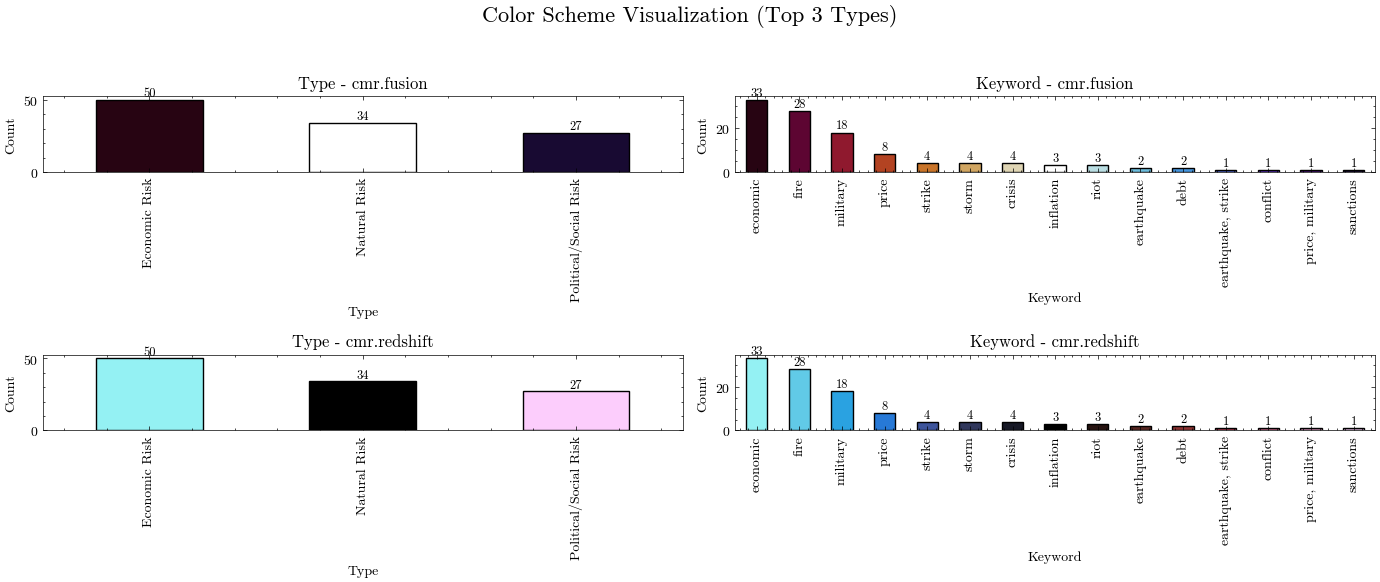

Keyword counts:
 匹配关键词
economic              33
fire                  28
military              18
price                  8
strike                 4
storm                  4
crisis                 4
inflation              3
riot                   3
earthquake             2
debt                   2
earthquake, strike     1
conflict               1
price, military        1
sanctions              1
Name: count, dtype: int64
Type counts:
 类型英文
Economic Risk            50
Natural Risk             34
Political/Social Risk    27
Name: count, dtype: int64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scienceplots
import cmasher as cmr

# 设置中文字体（防止中文乱码），但图表中不显示中文
rcParams['font.family'] = 'Songti SC'
rcParams['axes.unicode_minus'] = False

plt.style.use(['science', 'no-latex'])

# 读取数据
df = pd.read_excel("埃及/2.xlsx")

# 中文转英文映射字典
type_translate = {
    "政治(社会)风险": "Political/Social Risk",
    "经济风险": "Economic Risk",
    "自然风险": "Natural Risk",
}
df["类型英文"] = df["类型"].map(type_translate)

# 统计前3个类型
type_counts = df["类型英文"].value_counts().head(3)

# 匹配关键词统计（如无翻译，保留原样）
keyword_counts = df["匹配关键词"].value_counts()

# 配色方案列表
colormap_names = ['cmr.fusion', 'cmr.redshift']

fig, axes = plt.subplots(len(colormap_names), 2, figsize=(14, 3 * len(colormap_names)))
fig.suptitle('Color Scheme Visualization (Top 3 Types)', fontsize=16)

for i, cmap_name in enumerate(colormap_names):
    # 当前配色
    type_colors = cmr.take_cmap_colors(cmap_name, len(type_counts), return_fmt='hex')
    keyword_colors = cmr.take_cmap_colors(cmap_name, len(keyword_counts), return_fmt='hex')
    
    # 左图：类型
    type_counts.plot(kind="bar", ax=axes[i, 0], color=type_colors, edgecolor='black')
    axes[i, 0].set_title(f"Type - {cmap_name}")
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].set_xlabel("Type")
    
    for j, v in enumerate(type_counts):
        axes[i, 0].text(j, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

    # 右图：关键词
    keyword_counts.plot(kind="bar", ax=axes[i, 1], color=keyword_colors, edgecolor='black')
    axes[i, 1].set_title(f"Keyword - {cmap_name}")
    axes[i, 1].set_ylabel("Count")
    axes[i, 1].set_xlabel("Keyword")

    for j, v in enumerate(keyword_counts):
        axes[i, 1].text(j, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 打印输出
print("Keyword counts:\n", keyword_counts)
print("Type counts:\n", type_counts)


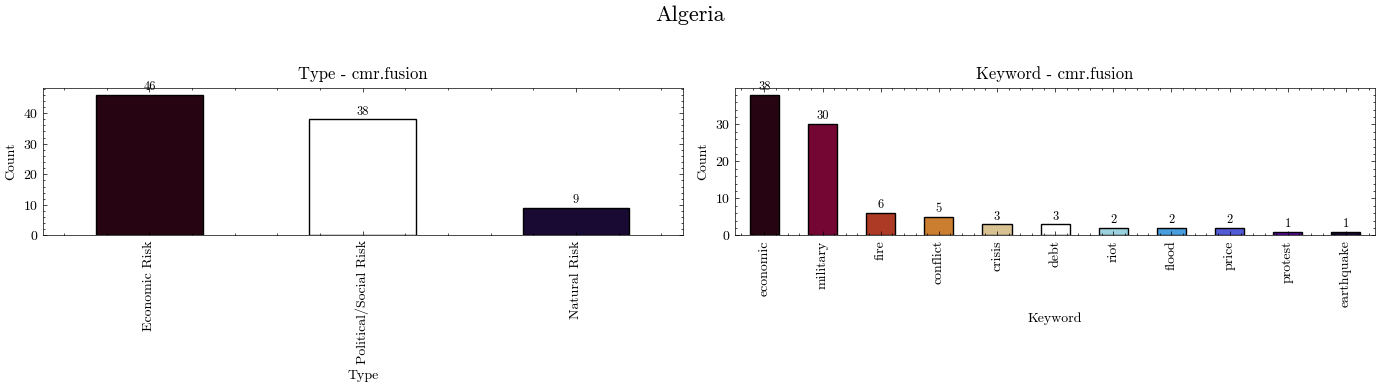

Keyword counts:
 匹配关键词
economic      38
military      30
fire           6
conflict       5
crisis         3
debt           3
riot           2
flood          2
price          2
protest        1
earthquake     1
Name: count, dtype: int64
Top 3 Type counts:
 类型英文
Economic Risk            46
Political/Social Risk    38
Natural Risk              9
Name: count, dtype: int64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scienceplots
import cmasher as cmr

# 设置中文字体（防止乱码）
rcParams['font.family'] = 'Songti SC'
rcParams['axes.unicode_minus'] = False

plt.style.use(['science', 'no-latex'])

# 读取数据
df = pd.read_excel("阿尔及利亚/阿尔及利亚final.xlsx")

# 中文转英文映射字典
type_translate = {
    "政治(社会)风险": "Political/Social Risk",
    "经济风险": "Economic Risk",
    "自然风险": "Natural Risk",
}
df["类型英文"] = df["匹配类型"].map(type_translate)

# 类型计数 - 取前3个
type_counts = df["类型英文"].value_counts().head(3)
# 关键词计数
keyword_counts = df["匹配关键词"].value_counts()

# 使用第一种配色方案 cmr.fusion
cmap_name = 'cmr.fusion'
type_colors = cmr.take_cmap_colors(cmap_name, len(type_counts), return_fmt='hex')
keyword_colors = cmr.take_cmap_colors(cmap_name, len(keyword_counts), return_fmt='hex')

# 创建图形
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Algeria', fontsize=16)

# 左图：类型
type_counts.plot(kind="bar", ax=axes[0], color=type_colors, edgecolor='black')
axes[0].set_title("Type - cmr.fusion")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Type")
for j, v in enumerate(type_counts):
    axes[0].text(j, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

# 右图：关键词
keyword_counts.plot(kind="bar", ax=axes[1], color=keyword_colors, edgecolor='black')
axes[1].set_title("Keyword - cmr.fusion")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Keyword")
for j, v in enumerate(keyword_counts):
    axes[1].text(j, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 打印统计数据
print("Keyword counts:\n", keyword_counts)
print("Top 3 Type counts:\n", type_counts)
